<a href="https://colab.research.google.com/github/darcor99/Ireland-Transport-Data-analysis/blob/main/Dublin_transport_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install jsonstat
!pip3 install cso-ireland-data
!pip3 install pandasql
import pandas as pd
import requests
from bs4 import BeautifulSoup
from os import path
import jsonstat
import matplotlib.pyplot as plt
import json
from cso_ireland_data import CSODataSession
import pandasql as ps
from datetime import timedelta
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=cb38cb63386e5b7202dfe2319d8d75b647d46a39e845044b62252edf6fefd38e
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
#Dublin bike api

#source: https://data.gov.ie/dataset/pedestrian-and-cycle-counter-api-for-dublin-region/resource/cad825d4-9527-4475-8bc1-ba5967c3e019?inner_span=True

#weburl = 'https://data.eco-counter.com/ParcPublic/'


#api url
url = 'https://api.eco-counter.com/api/v2/sites'
url = 'https://api.eco-counter.com/api/v2/sites?pageSize=5&page=2'

key = 'ebxNfq0IJ3iVH9p6VFEO'

params = {'key' : key}
response = requests.get(url, params=params)
response.status_code


if response.status_code == 200:
    data = response.json()
    # Process the data here
    print(data)
else:
    print('Error:', response.status_code)

##getting error 401 for this one

Error: 401


In [ ]:
##cso data:
from datetime import timedelta
from cso_ireland_data import CSODataSession

cso = CSODataSession(
    cached_session_params={
        "use_cache_dir": True,  # Save files in the default user cache dir
        "cache_control": True,  # Use Cache-Control response headers for expiration, if available
        "expire_after": timedelta(days=1),  # Otherwise expire responses after one day
    }
)




In [ ]:
cso_bikeshare_df = cso.get_table("TOA08")
cso_bikeshare_df.head()

Statistic        Long term subscriptions  Short term subscriptions   Journeys
Year Month                                                                   
2017 All months                  15545.0                   17484.0  4104467.0
     April                        1266.0                    1748.0   329188.0
     August                       1403.0                    2120.0   358825.0
     December                      684.0                     565.0   256470.0
     February                      934.0                     597.0   299437.0

In [ ]:
yearly_cycle_df = ps.sqldf('''SELECT * FROM cso_bikeshare_df
WHERE Month = \'All months\'
;
''')

monthly_cycle_df = ps.sqldf('''SELECT * FROM cso_bikeshare_df
WHERE Month <> \'All months\'
;
''')

In [ ]:
print(yearly_cycle_df);

   Year       Month  Long term subscriptions  Short term subscriptions  \
0  2017  All months                  15545.0                   17484.0   
1  2018  All months                  14933.0                   16251.0   
2  2019  All months                  14842.0                   12383.0   
3  2020  All months                   8719.0                    4650.0   
4  2021  All months                   6872.0                   23577.0   
5  2022  All months                   9498.0                   59207.0   
6  2023  All months                   6932.0                   64386.0   

    Journeys  
0  4104467.0  
1  3858882.0  
2  3816652.0  
3  1780825.0  
4  1356522.0  
5  2001810.0  
6  2034075.0  


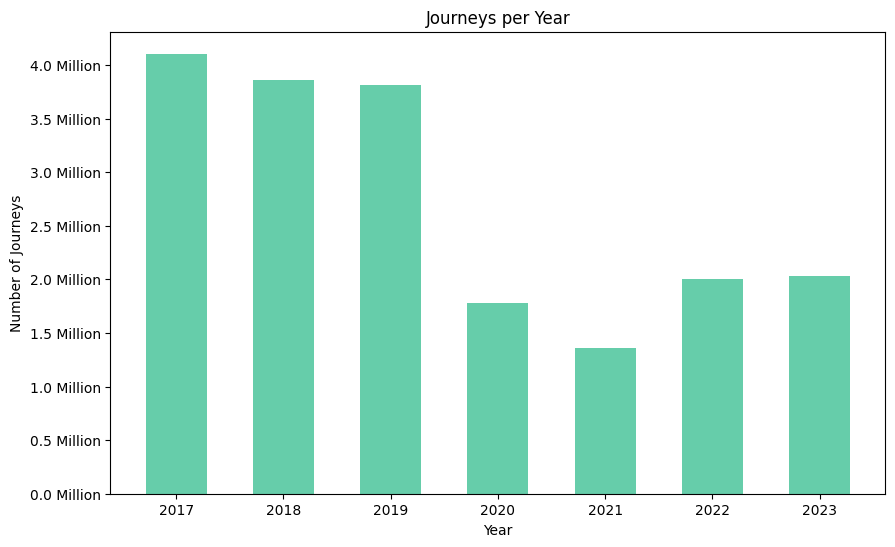

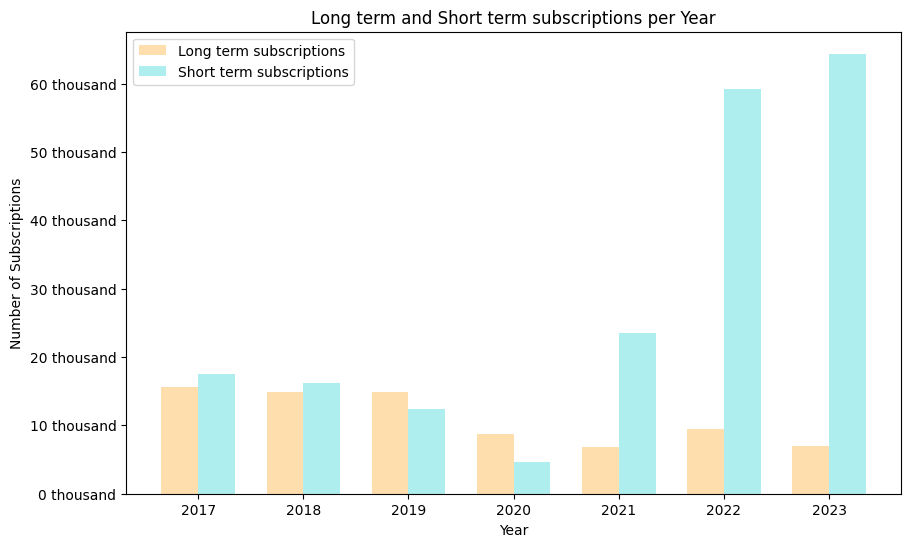

In [ ]:
# prompt: using df yearly_cycle_df, Plot Journeys against Year using vertical bars for number of journeys each year and then do a separate plot to plot Long term subscriptions and Short term subscriptions against Year, again using veritcal bars for the count of number of subscriptions for each year, have the bars for Short term subscriptions and Long term subscriptions side by side for each year on the plot


# Plot Journeys against Year


plt.figure(figsize=(10, 6))

#plt.ticklabel_format(style='plain')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f} Million".format(x / 1000000)))
plt.bar(yearly_cycle_df['Year'], yearly_cycle_df['Journeys'], color = 'mediumaquamarine',  width = 0.57)
plt.xlabel('Year')
plt.ylabel('Number of Journeys')
plt.title('Journeys per Year')

plt.show()

# Plot Long term subscriptions and Short term subscriptions against Year
plt.figure(figsize=(10, 6))
width = 0.35
yearly_cycle_df['Year'] = pd.to_numeric(yearly_cycle_df['Year'])
x = yearly_cycle_df['Year']
plt.bar(x - width/2, yearly_cycle_df['Long term subscriptions'], width, label='Long term subscriptions', color = 'navajowhite')
plt.bar(x + width/2, yearly_cycle_df['Short term subscriptions'], width, label='Short term subscriptions', color = 'paleturquoise')
plt.xlabel('Year')
plt.ylabel('Number of Subscriptions')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f} thousand".format(x / 1000)))
plt.title('Long term and Short term subscriptions per Year')
plt.legend()
plt.show()


In [ ]:
print(monthly_cycle_df);

monthly_cycle_df_2017 = ps.sqldf('''SELECT * FROM monthly_cycle_df
WHERE Year = 2017
;
''')

    Year      Month  Long term subscriptions  Short term subscriptions  \
0   2017      April                   1266.0                    1748.0   
1   2017     August                   1403.0                    2120.0   
2   2017   December                    684.0                     565.0   
3   2017   February                    934.0                     597.0   
4   2017    January                   1352.0                     646.0   
..   ...        ...                      ...                       ...   
79  2023      March                    468.0                    3600.0   
80  2023        May                    788.0                    7552.0   
81  2023   November                    484.0                    4276.0   
82  2023    October                    656.0                    6565.0   
83  2023  September                    819.0                    6337.0   

    Journeys  
0   329188.0  
1   358825.0  
2   256470.0  
3   299437.0  
4   325331.0  
..       ...  
79  16

In [ ]:
###plot 2017 data


##sort the dataset by month first
Month = ["January", "February", "March", "April", "May", "June",
         "July", "August", "September", "October", "November", "December"]

# Convert the 'Month' column to a categorical type with the defined order
monthly_cycle_df_2017['Month'] = pd.Categorical(monthly_cycle_df_2017['Month'],
                                               categories=Month,
                                               ordered=True)

# Sort the DataFrame by the 'Month' column
monthly_cycle_df_2017.sort_values('Month', inplace=True)


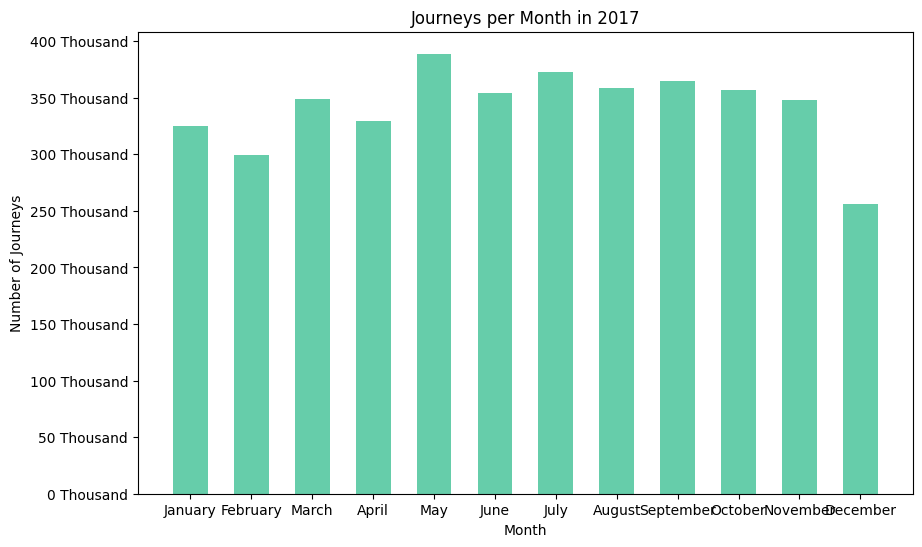

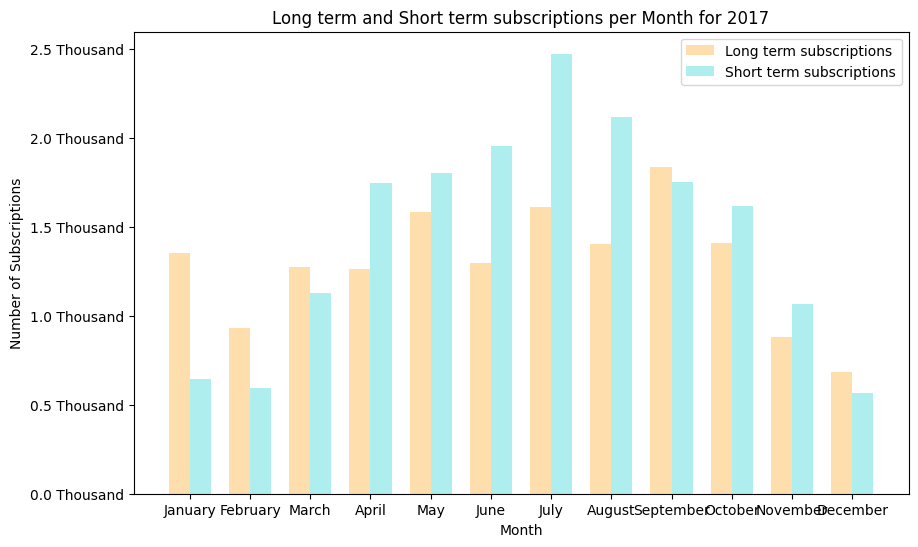

In [ ]:
# prompt: use monthly_cycle_df_2017 Plot Journeys against Month using vertical bars for number of journeys each month and then do a separate plot to plot Long term subscriptions and Short term subscriptions against month using veritcal bars for the count of number of subscriptions for each month have the bars for Short term subscriptions and Long term subscriptions side by side for each month on the plot



import matplotlib.pyplot as plt
# Plot Journeys against Month
plt.figure(figsize=(10, 6))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f} thousand".format(x / 1000)))
plt.bar(monthly_cycle_df_2017['Month'], monthly_cycle_df_2017['Journeys'], color = 'mediumaquamarine',  width = 0.57)
plt.xlabel('Month')
plt.ylabel('Number of Journeys')
plt.title('Journeys per Month in 2017')
plt.show()

# Plot Long term subscriptions and Short term subscriptions against Month
plt.figure(figsize=(10, 6))
width = 0.35
# Use the index as x-axis for plotting the bars
x = range(len(monthly_cycle_df_2017['Month']))
plt.bar([i - width/2 for i in x], monthly_cycle_df_2017['Long term subscriptions'], width, label='Long term subscriptions', color = 'navajowhite')
plt.bar([i + width/2 for i in x], monthly_cycle_df_2017['Short term subscriptions'], width, label='Short term subscriptions', color = 'paleturquoise')
plt.xticks(x, monthly_cycle_df_2017['Month']) # Set the x-ticks to be the month names
plt.xlabel('Month')
plt.ylabel('Number of Subscriptions')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f} thousand".format(x / 1000)))
plt.title('Long term and Short term subscriptions per Month for 2017')
plt.legend()
plt.show()


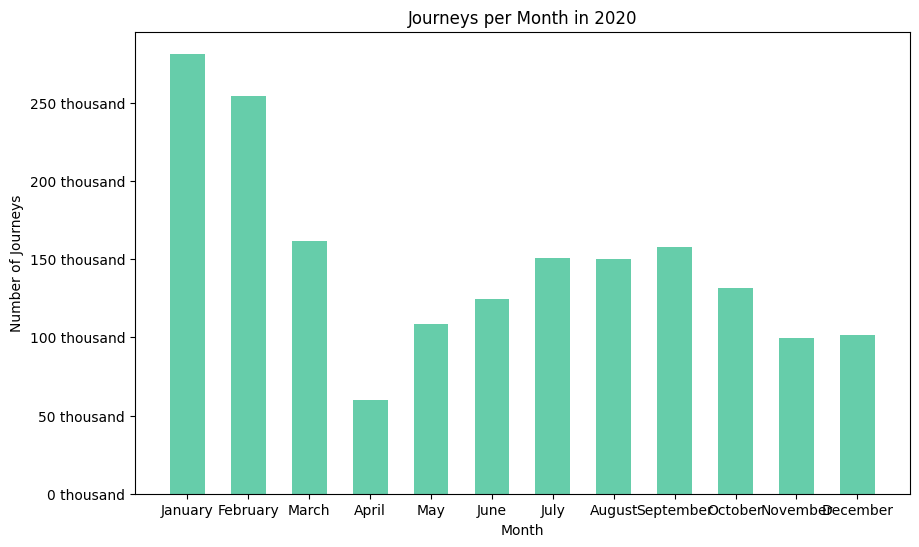

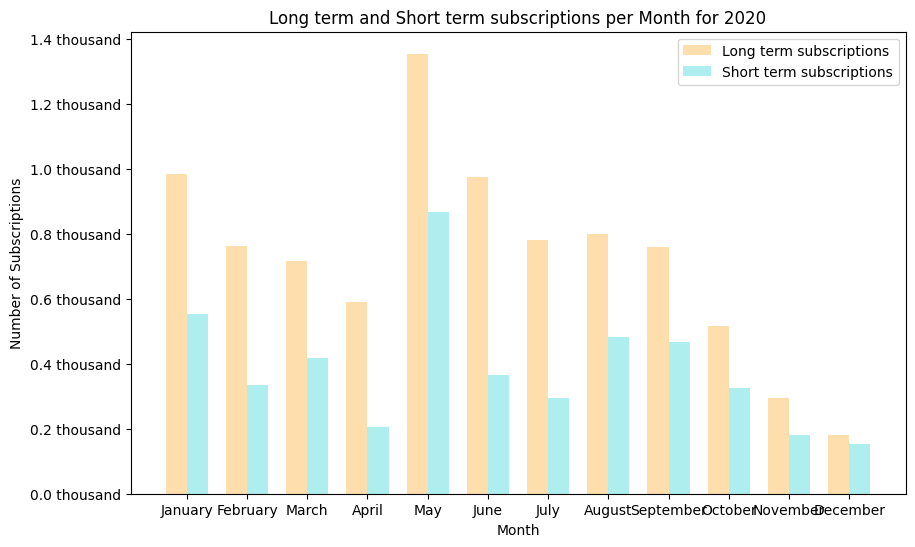

In [ ]:
####plot 2020


monthly_cycle_df_2020 = ps.sqldf('''SELECT * FROM monthly_cycle_df
WHERE Year = 2020
;
''')

#sort df

##sort the dataset by month first
Month = ["January", "February", "March", "April", "May", "June",
         "July", "August", "September", "October", "November", "December"]

# Convert the 'Month' column to a categorical type with the defined order
monthly_cycle_df_2020['Month'] = pd.Categorical(monthly_cycle_df_2020['Month'],
                                               categories=Month,
                                               ordered=True)

# Sort the DataFrame by the 'Month' column
monthly_cycle_df_2020.sort_values('Month', inplace=True)




#plot

plt.figure(figsize=(10, 6))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f} thousand".format(x / 1000)))
plt.bar(monthly_cycle_df_2020['Month'], monthly_cycle_df_2020['Journeys'], color = 'mediumaquamarine',  width = 0.57)
plt.xlabel('Month')
plt.ylabel('Number of Journeys')
plt.title('Journeys per Month in 2020')
plt.show()

# Plot Long term subscriptions and Short term subscriptions against Month
plt.figure(figsize=(10, 6))
width = 0.35
# Use the index as x-axis for plotting the bars
x = range(len(monthly_cycle_df_2020['Month']))
plt.bar([i - width/2 for i in x], monthly_cycle_df_2020['Long term subscriptions'], width, label='Long term subscriptions', color = 'navajowhite')
plt.bar([i + width/2 for i in x], monthly_cycle_df_2020['Short term subscriptions'], width, label='Short term subscriptions', color = 'paleturquoise')
plt.xticks(x, monthly_cycle_df_2020['Month']) # Set the x-ticks to be the month names
plt.xlabel('Month')
plt.ylabel('Number of Subscriptions')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f} thousand".format(x / 1000)))
plt.title('Long term and Short term subscriptions per Month for 2020')
plt.legend()
plt.show()

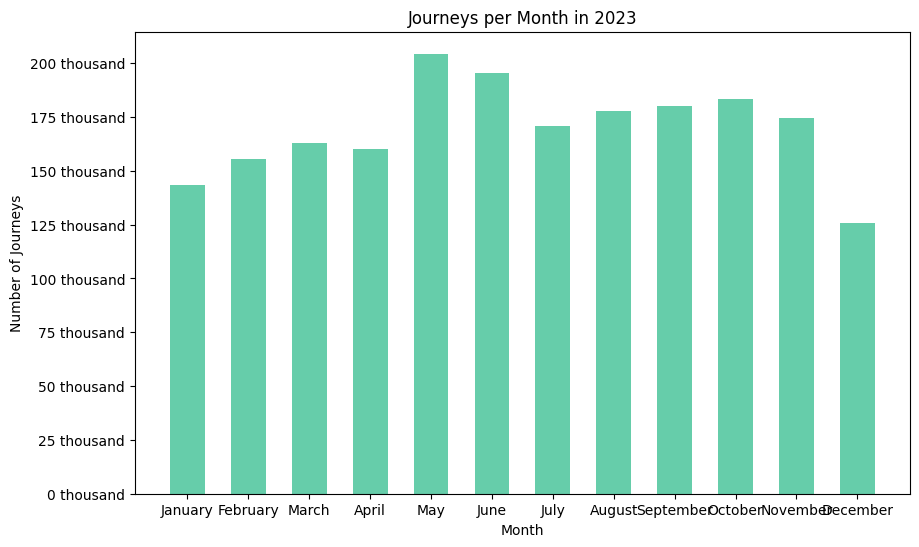

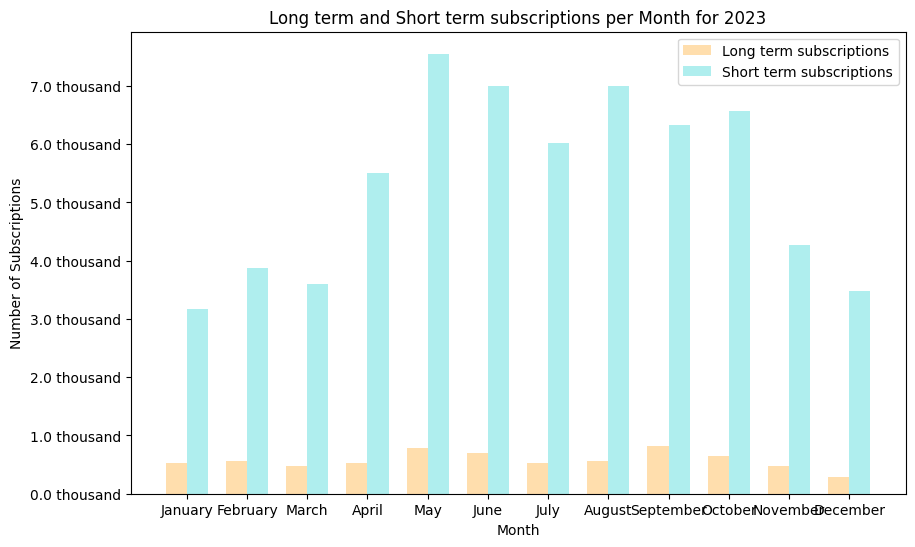

In [ ]:
####plot 2023


monthly_cycle_df_2023 = ps.sqldf('''SELECT * FROM monthly_cycle_df
WHERE Year = 2023
;
''')

#sort df

##sort the dataset by month first
Month = ["January", "February", "March", "April", "May", "June",
         "July", "August", "September", "October", "November", "December"]

# Convert the 'Month' column to a categorical type with the defined order
monthly_cycle_df_2023['Month'] = pd.Categorical(monthly_cycle_df_2023['Month'],
                                               categories=Month,
                                               ordered=True)

# Sort the DataFrame by the 'Month' column
monthly_cycle_df_2023.sort_values('Month', inplace=True)




#plot

plt.figure(figsize=(10, 6))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.0f} thousand".format(x / 1000)))
plt.bar(monthly_cycle_df_2023['Month'], monthly_cycle_df_2023['Journeys'], color = 'mediumaquamarine',  width = 0.57)
plt.xlabel('Month')
plt.ylabel('Number of Journeys')
plt.title('Journeys per Month in 2023')
plt.show()

# Plot Long term subscriptions and Short term subscriptions against Month
plt.figure(figsize=(10, 6))
width = 0.35
# Use the index as x-axis for plotting the bars
x = range(len(monthly_cycle_df_2023['Month']))
plt.bar([i - width/2 for i in x], monthly_cycle_df_2023['Long term subscriptions'], width, label='Long term subscriptions', color = 'navajowhite')
plt.bar([i + width/2 for i in x], monthly_cycle_df_2023['Short term subscriptions'], width, label='Short term subscriptions', color = 'paleturquoise')
plt.xticks(x, monthly_cycle_df_2023['Month']) # Set the x-ticks to be the month names
plt.xlabel('Month')
plt.ylabel('Number of Subscriptions')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f} thousand".format(x / 1000)))
plt.title('Long term and Short term subscriptions per Month for 2023')
plt.legend()
plt.show()

In [ ]:
###look at historical diblin bikes rental data, :
##https://data.gov.ie/dataset/dublinbikes-api
##https://data.gov.ie/dataset/dublin-city-centre-cycle-counts
#>get popular station data
#>get avg cycle time
#>peak usage time
#>stations with most bikes available
#>

##look at this bleeper bike data: https://data.smartdublin.ie/dataset/bleeperbike
##aalso look at this bike data:  https://data.smartdublin.ie/dataset/moby-bikes

##see if i could map heatmaps of most popular rental locations and plot how often they are rented
##compare to the dublin bikes in terms of rentals

##dlr cycle counts: https://data.smartdublin.ie/dataset/bicycle-traffic-counts-dlr

##pedestrain footfall data dlr:  https://data.smartdublin.ie/dataset/pedestrian-footfall-dlr



##CSO TOA14 - Dublin Bus Passenger Numbers by Month
##TOA16 - Summary of scheduled bus passenger services
##CSO TOA17 - Bus Éireann passenger numbers
##CSO TOA19 - Average daily flow of Dublin Bus and Bus Éireann passengers
##CSO TOA15 - Average weekly flow of Dublin Bus and Bus Éireann passengers
##CSO TOA18 - Bus Éireann Fleet

##TOA12 - Number of licensed bus operators

# #Dublin Bus GPS sample data (Insight Project) from DCC ##2012/2013 data, could
# be useful for comparisons?

##CSO frequency of bus services: https://data.gov.ie/dataset/nta55-frequency-of-use-of-bus-services

In [7]:
#use following Cycle counts dataset: https://data.smartdublin.ie/dataset/d26ce6c0-2e1c-4b72-8fbd-cb9f9cbbc118/resource/8c73aec0-9f8b-48e9-8df6-9ad977a79af7/download/cycle-counts-1-jan-2-september-2024.csv
#counts number of cyclists on certain routes in dublin every hour from Jan 1 2024 to Se


import pandas as pd
import requests

# URL of the CSV file
url = "https://data.smartdublin.ie/dataset/d26ce6c0-2e1c-4b72-8fbd-cb9f9cbbc118/resource/8c73aec0-9f8b-48e9-8df6-9ad977a79af7/download/cycle-counts-1-jan-2-september-2024.csv"

try:
    # Download the CSV file using pandas
    df = pd.read_csv(url)

    # Now you can work with the DataFrame 'df'
    print(df.head())  # Display the first few rows
    # ... further processing of the data ...

except requests.exceptions.RequestException as e:
    print(f"Error downloading the CSV file: {e}")
except pd.errors.ParserError as e:
    print(f"Error parsing the CSV file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


print(df['North Strand Rd S/B (Counter Removed for Roadworks) Cyclist'].size)

               Time  \
0  01/01/2024 00:00   
1  01/01/2024 01:00   
2  01/01/2024 02:00   
3  01/01/2024 03:00   
4  01/01/2024 04:00   

   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023)  \
0                                                NaN                                     
1                                                NaN                                     
2                                                NaN                                     
3                                                NaN                                     
4                                                NaN                                     

   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist  \
0                                                NaN                                                   
1                                                NaN                                                   
2       

In [8]:
CT_df = df['Clontarf - James Larkin Rd']

0    1.0
1    2.0
2    0.0
3    0.0
4    1.0
Name: Clontarf - James Larkin Rd, dtype: float64


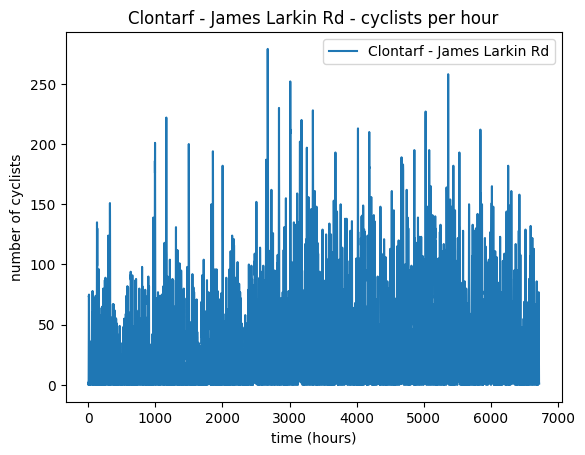

In [11]:
print(CT_df.head())


CT_df.reset_index().plot(x='index', y = 'Clontarf - James Larkin Rd')
plt.xlabel('time (hours)')
plt.ylabel('number of cyclists')
plt.title('Clontarf - James Larkin Rd - cyclists per hour')
plt.show()

In [ ]:
####want to use time series to get moving average/ some kind of average trend line of the above plot

####could be good to compare to last year's dataset to see if there are any differences in numbers of cyclists